In [2]:
import numpy as np
import pandas as pd
try:
    df = pd.read_csv('Spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('Spam.csv', encoding='latin-1')




In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3
3308,ham,Okie Ì_ wan meet at bishan? Cos me at bishan n...,NaN,NaN
2403,ham,Jesus christ bitch I'm trying to give you drug...,NaN,NaN
281,ham,\Wen u miss someone,why to miss them,"just Keep-in-touch\"" gdeve.."""
919,ham,Dont talk to him ever ok its my word.,NaN,NaN
4692,ham,Tessy..pls do me a favor. Pls convey my birthd...,NaN,NaN


In [4]:
df.shape


(5572, 4)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5569 non-null   object
 2   Unnamed: 2  12 non-null     object
 3   Unnamed: 3  6 non-null      object
dtypes: object(4)
memory usage: 174.2+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3'], inplace=True)



In [7]:
df.sample(5)

,v1,v2
3899,ham,Okie
2474,ham,"Princess, i like to make love &lt;#&gt; time..."
879,spam,U have a Secret Admirer who is looking 2 make ...
1543,spam,Hello from Orange. For 1 month's free access t...
3078,ham,*deep sigh* ... I miss you :-( ... I am really...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
1436,ham,I jus hope its true that missin me cos i'm re...
1844,ham,Da is good good player.why he is unsold.
1563,ham,Get ready to put on your excellent sub face :)
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
4847,ham,S.this will increase the chance of winning.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] =encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      3
dtype: int64

In [ ]:
df.duplicated().sum()

405

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5167, 2)

# EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4514
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

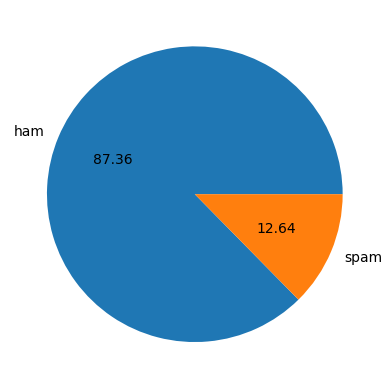

In [19]:
plt.pie(df['target'].value_counts(),
        labels=['ham','spam'],
        autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df['text'] = df['text'].astype(str)  # Convert all entries to strings
df['text_length'] = df['text'].apply(len)  # Apply len() function safely
df['text_length']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text_length, Length: 5167, dtype: int64

In [26]:
df.head()

,target,text,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5167, dtype: object

In [28]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5167, dtype: int64

In [29]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,text_length,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5167, dtype: object

In [33]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,text_length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['text_length','num_words','num_sentences']].describe()

,text_length,num_words,num_sentences
count,5167.000000,5167.000000,5167.000000
mean,78.681053,18.392104,1.964002
std,56.748664,13.060904,1.446645
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,790.000000,220.000000,38.000000


In [35]:
#ham messeges
df[df['target']==0][['text_length','num_words','num_sentences']].describe()

,text_length,num_words,num_sentences
count,4514.000000,4514.000000,4514.000000
mean,70.115640,17.050288,1.818343
std,54.539032,13.188030,1.381162
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,790.000000,220.000000,38.000000


In [36]:
#Spam messages
df[df['target']==1][['text_length','num_words','num_sentences']].describe()

,text_length,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='text_length', ylabel='Count'>

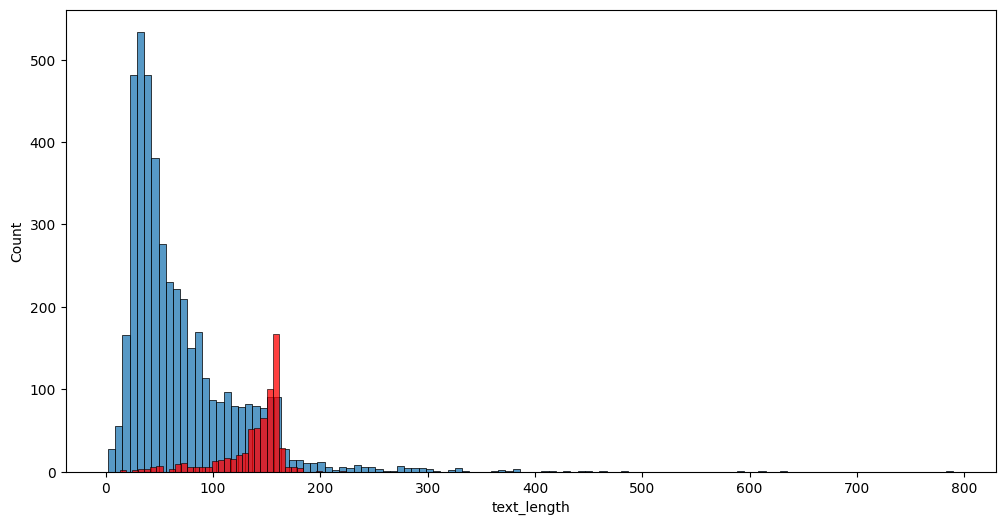

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['text_length'])
sns.histplot(df[df['target']==1]['text_length'],
             color="r")

<Axes: xlabel='num_words', ylabel='Count'>

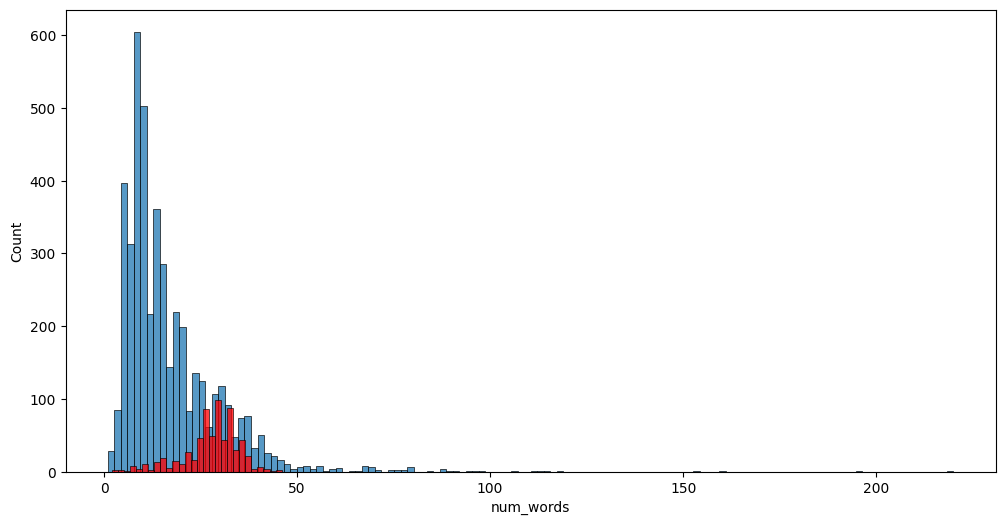

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],
             color="r")

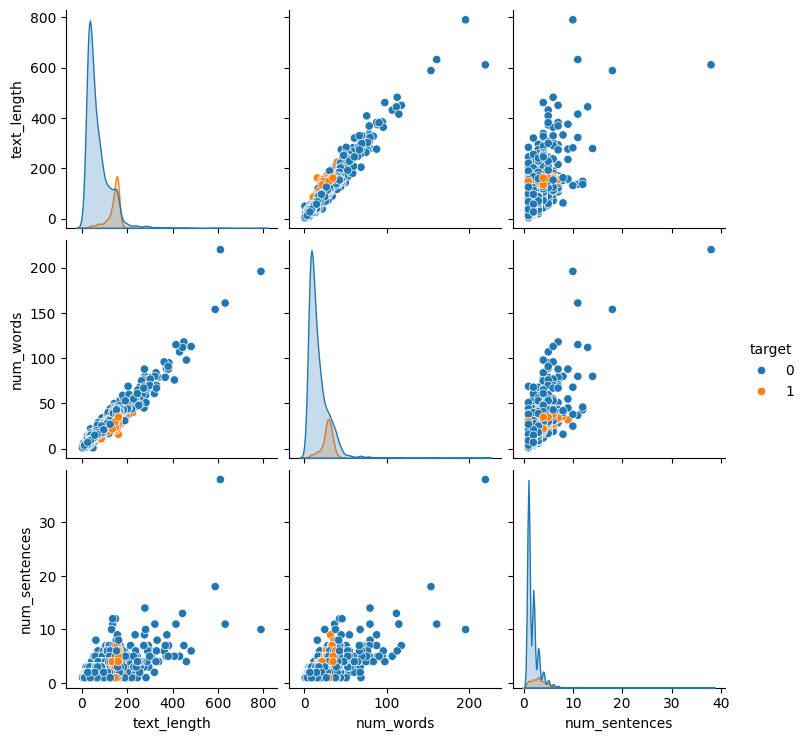

In [42]:
sns.pairplot(df,hue='target')

#Data Preprocesssing

*   Lower Case
*   Tokenization
*   Removing special character
*   Removing stop words and punctuation
*   Stemming







In [68]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i  not in string.punctuation:
      y.append(i)


  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))



  return " " .join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [73]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,text_length,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [75]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

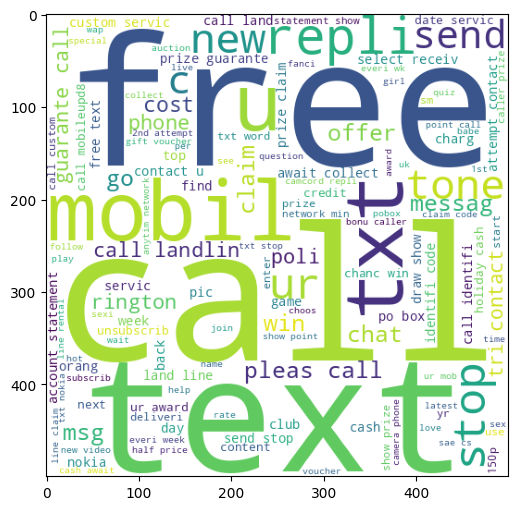

In [76]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [78]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

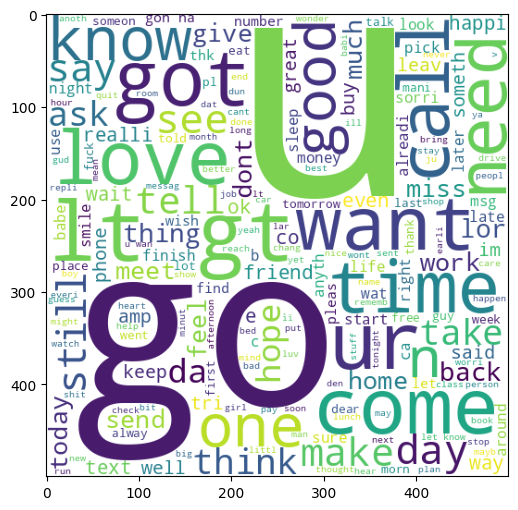

In [79]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [80]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '